# 数据读取

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
with open('ARdata/symbolsSigAvg_2018050120211124_60min_v18_ar.pkl','rb') as f:
    dfARlocal = pickle.load(f)['60min']
with open('ARdata/symbolsData_2018032120211124_5min_v13_BBELB.pkl','rb') as f:
    dfCoin = pickle.load(f)['5min']
# dfARlocal = dfARlocal[['ar18','ar36','ar72','ar144','ar288','ar864','ar1440','ar2016','ar2880']]
dfARlocal

symbol,ar18,ar36,ar72,ar144,ar288,ar864,ar1440,ar2016,ar2880
field,,,,,,,,,
timestamp,,,,,,,,,
2018-05-01 08:00:00+00:00,0.959146,0.928970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-01 09:00:00+00:00,0.962515,0.933960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-01 10:00:00+00:00,0.962453,0.939383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-01 11:00:00+00:00,0.964196,0.939271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-01 12:00:00+00:00,0.964818,0.940595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-11-24 02:00:00+00:00,0.860905,0.870805,0.857384,0.877891,0.844328,0.772858,0.771770,0.790493,0.799270
2021-11-24 03:00:00+00:00,0.857751,0.868221,0.859313,0.876021,0.844358,0.772739,0.771639,0.790478,0.799249


# AR曲线

<AxesSubplot:xlabel='timestamp'>

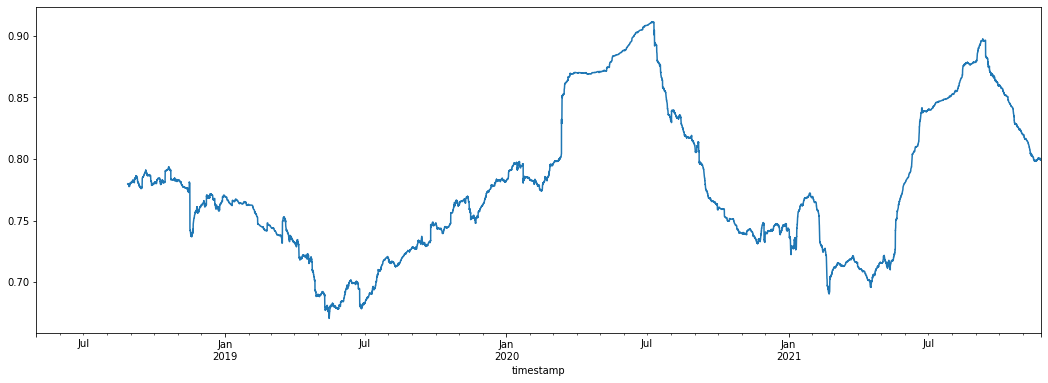

In [2]:
dfARlocal['ar2880'].plot(figsize=(18,6))

<AxesSubplot:xlabel='timestamp'>

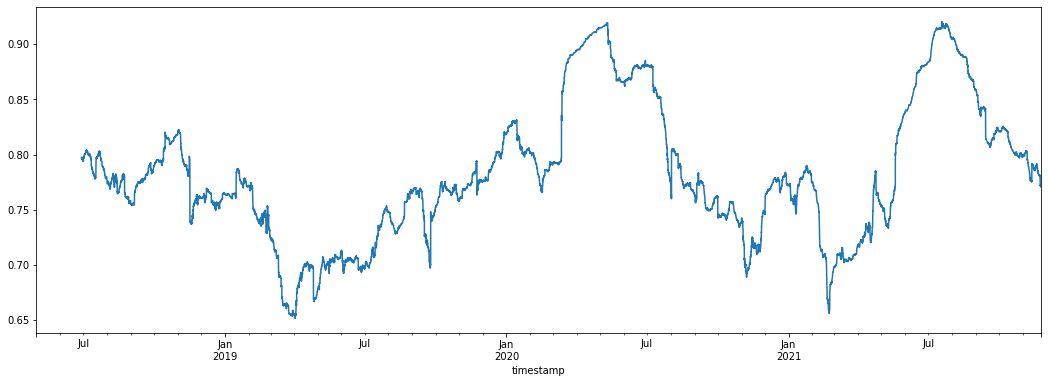

In [3]:
dfARlocal['ar1440'].plot(figsize=(18,6))

<AxesSubplot:xlabel='timestamp'>

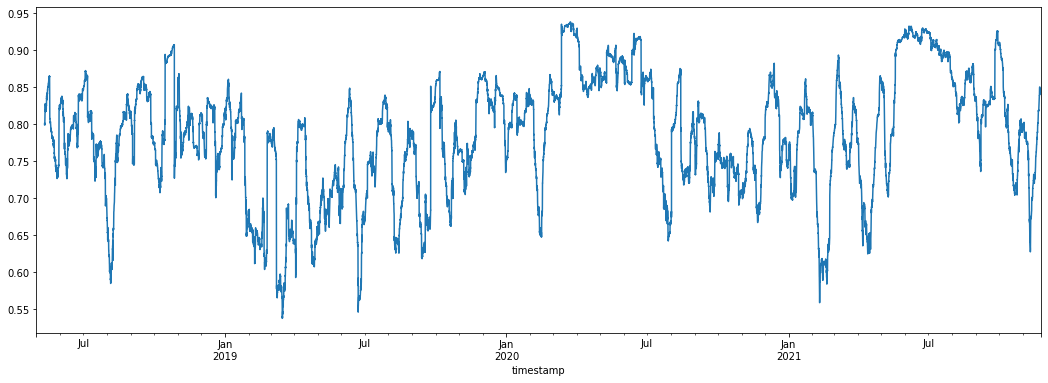

In [4]:
dfARlocal['ar288'].plot(figsize=(18,6))

# AR标准化

In [5]:
from scipy import stats
def normalizationProcess(dataArray):
    q75 = np.quantile(dataArray, 0.75)
    q50 = np.quantile(dataArray, 0.5)
    q25 = np.quantile(dataArray, 0.25)
    scaleResult = 100*stats.norm.cdf(0.5*(dataArray[-1]-q50)/(q75-q25))-50
    return scaleResult
def get_ar_norm(arCol,WinSize):
    arRollNorm = dfARlocal[arCol].dropna().rolling(WinSize).apply(normalizationProcess)
    return arRollNorm

In [6]:
# WinSizes = [24*30,24*40,24*50]
# arRollNorms288 = []
# for w in WinSizes:
#     tmp = get_ar_norm('ar288',w)
#     arRollNorms288.append(tmp)

# arRollNorms864 = []
# for w in WinSizes:
#     tmp = get_ar_norm('ar864',w)
#     arRollNorms288.append(tmp)

# AR标准化曲线

<AxesSubplot:title={'center':'eth'}, xlabel='timestamp'>

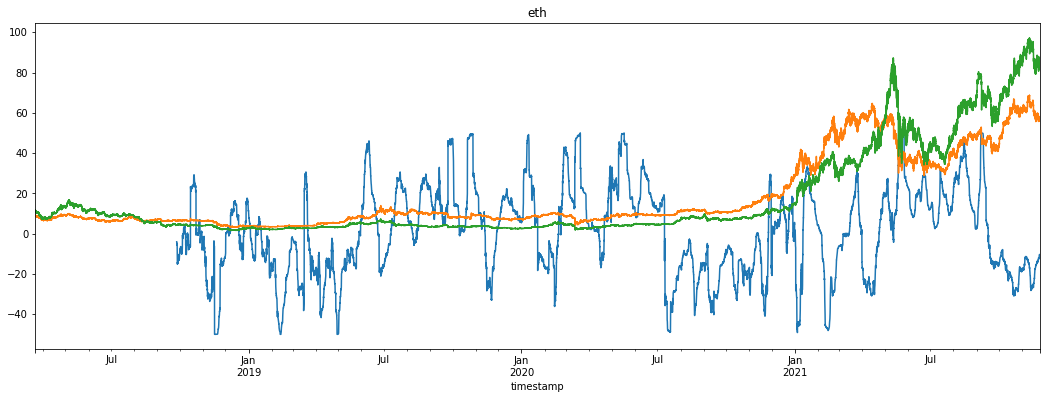

In [29]:
arRollNorm = get_ar_norm('ar2880',24*30)
arRollNorm.plot(figsize=(18,6))
(dfCoin.loc[:,('btc','close')]/1000).plot(title='btc',figsize=(18,6))
(dfCoin.loc[:,('eth','close')]/50).plot(title='eth',figsize=(18,6))

<AxesSubplot:title={'center':'eth'}, xlabel='timestamp'>

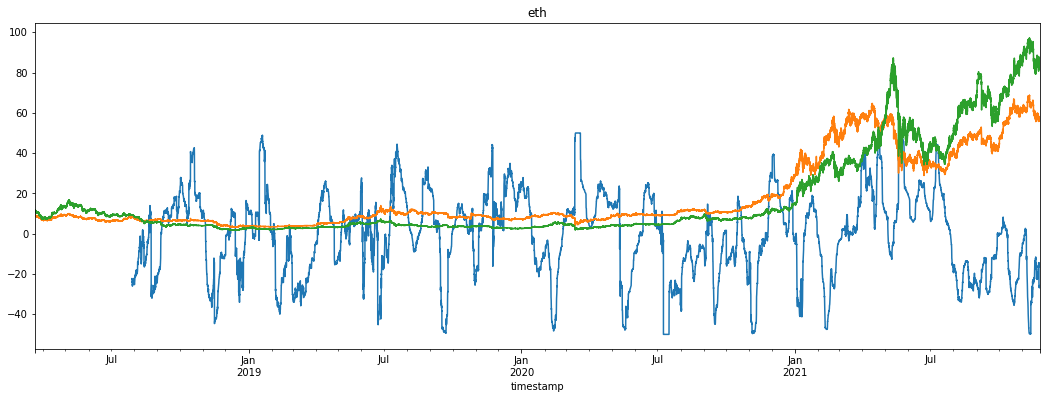

In [30]:
arRollNorm = get_ar_norm('ar1440',24*30)
arRollNorm.plot(figsize=(18,6))
(dfCoin.loc[:,('btc','close')]/1000).plot(title='btc',figsize=(18,6))
(dfCoin.loc[:,('eth','close')]/50).plot(title='eth',figsize=(18,6))

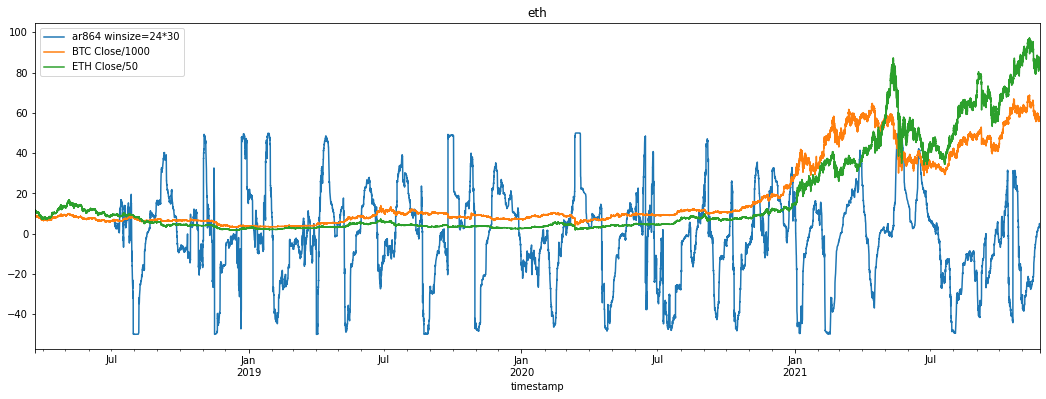

In [35]:
arRollNorm = get_ar_norm('ar864',24*30)
arRollNorm.plot(figsize=(18,6),label='ar864 winsize=24*30')
(dfCoin.loc[:,('btc','close')]/1000).plot(title='btc',figsize=(18,6),label='BTC Close/1000')
(dfCoin.loc[:,('eth','close')]/50).plot(title='eth',figsize=(18,6),label='ETH Close/50')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'eth'}, xlabel='timestamp'>

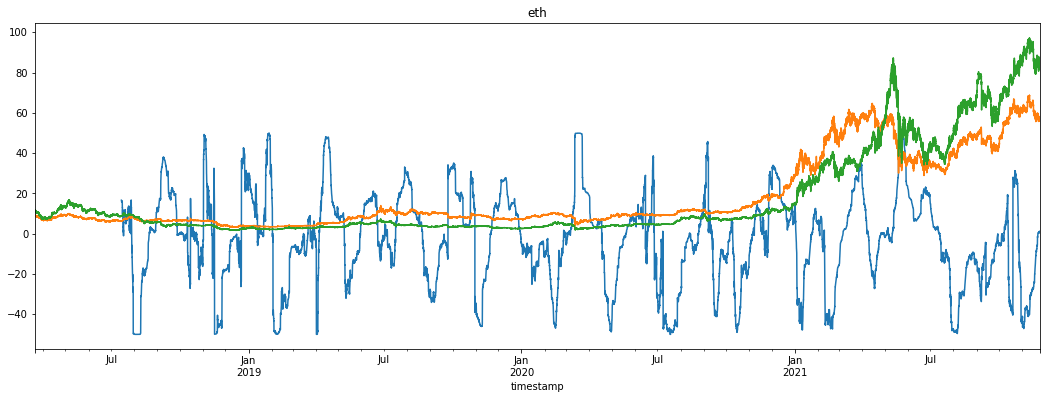

In [32]:
arRollNorm = get_ar_norm('ar864',24*40)
arRollNorm.plot(figsize=(18,6))
(dfCoin.loc[:,('btc','close')]/1000).plot(title='btc',figsize=(18,6))
(dfCoin.loc[:,('eth','close')]/50).plot(title='eth',figsize=(18,6))

<AxesSubplot:title={'center':'eth'}, xlabel='timestamp'>

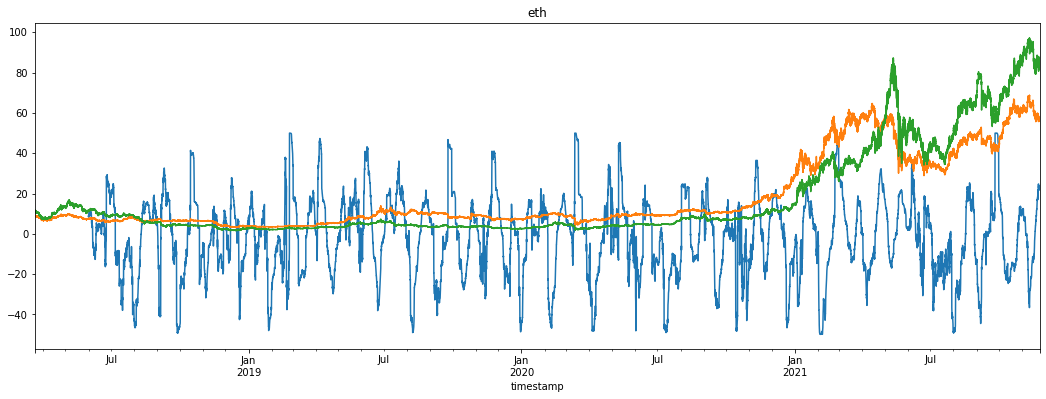

In [33]:
arRollNorm = get_ar_norm('ar288',24*20)
arRollNorm.plot(figsize=(18,6))
(dfCoin.loc[:,('btc','close')]/1000).plot(title='btc',figsize=(18,6))
(dfCoin.loc[:,('eth','close')]/50).plot(title='eth',figsize=(18,6))

# BTC ETH价格曲线

In [ ]:
dfCoin.loc[:,('btc','close')].plot(title='btc',figsize=(18,6))

<AxesSubplot:title={'center':'eth'}, xlabel='timestamp'>

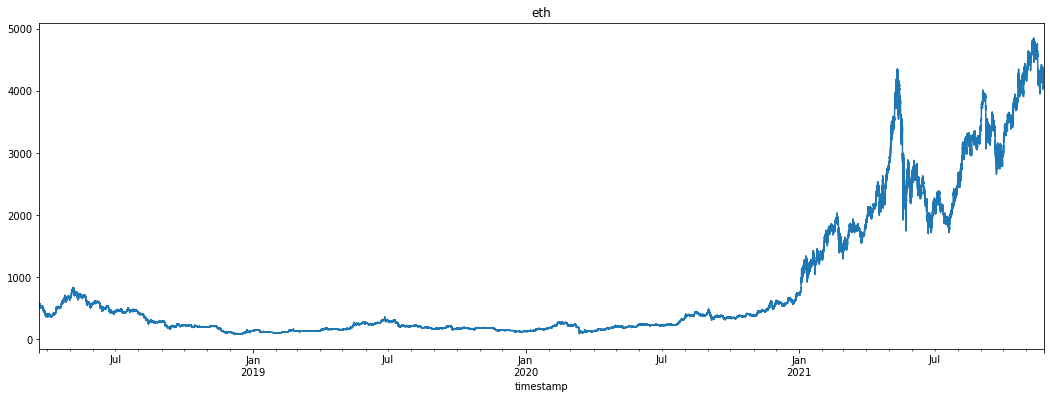

In [28]:
dfCoin.loc[:,('eth','close')].plot(title='eth',figsize=(18,6))